In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


The dataset has 4177 rows and 9 columns

In [3]:
df.shape

(4177, 9)

In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
#checking for null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

The data set doesn't show any null values

In [6]:
#checking for datatypes
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

We are determining the age of the abalone using the count in 'Rings' column. The column Rings is the target.
The sex column is in string format while the other rows are numerical

In [7]:
#checking the target variable
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

The rings column has multiple values with recurring ring numbers.It can be taken as a regression problem

In [8]:
#checking the column 'Sex' as it is string datatype
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

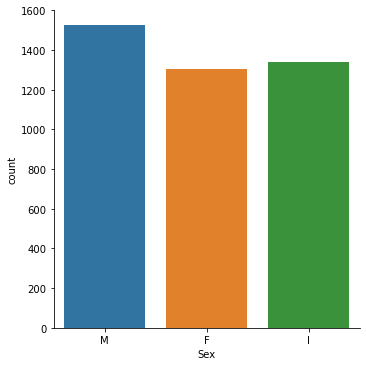

In [9]:
#checking the 'Sex' column using catplot
sns.catplot(x='Sex',data=df,kind='count')

The column shows the distribution of male,female and infant

In [10]:
#checking the correlation
dfcorr=df.corr()
dfcorr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

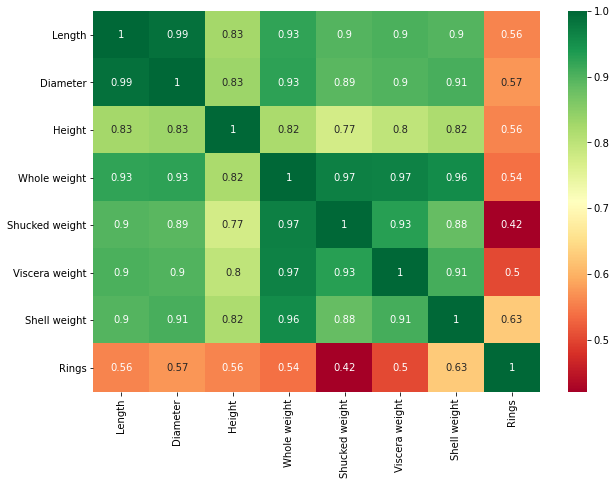

In [11]:
#plotting the correlation
plt.figure(figsize=(10,7)) 
sns.heatmap(dfcorr,annot=True,cmap="RdYlGn")

The columns Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight' are possitively correlated to the target variable 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

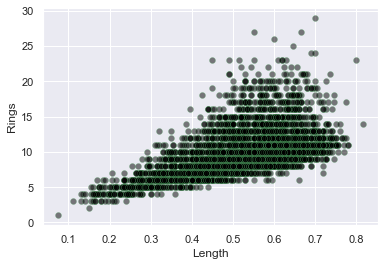

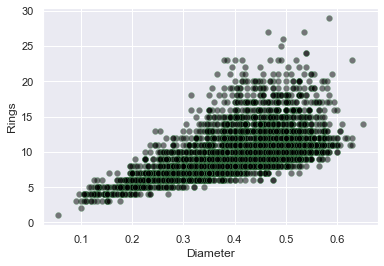

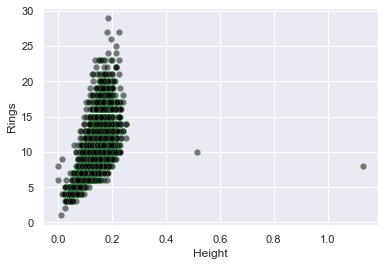

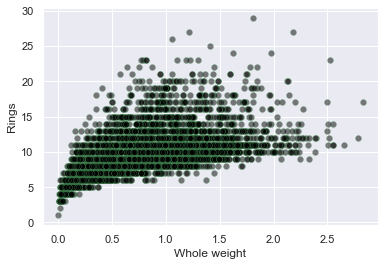

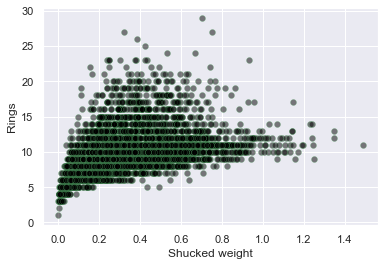

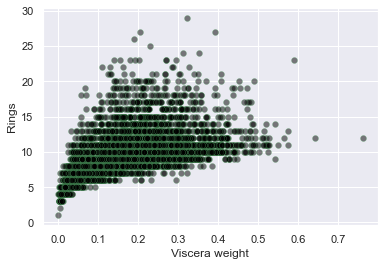

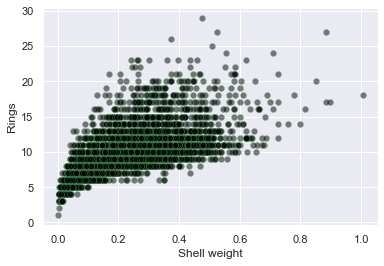

In [12]:
#plotting the variables in scatter plot to show the correlation
cols=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']
sns.set_theme(style="darkgrid")
for i in cols:
    plt.subplots()
    sns.scatterplot(x=i,y='Rings',edgecolor='g',alpha=0.5,c=(0,0,0),data=df)

The scatter plot shows the correlation between the features and the target variable.However the data seems to be having outliers

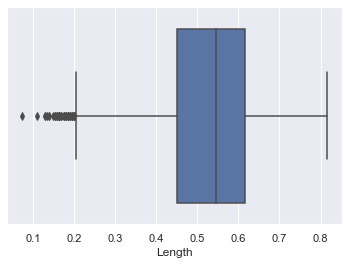

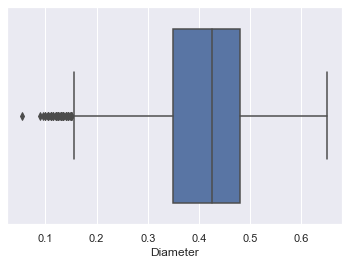

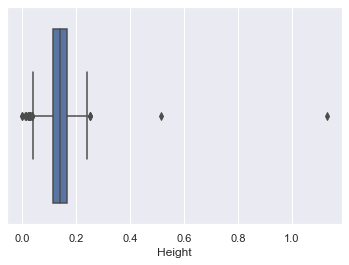

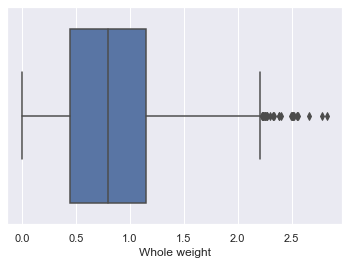

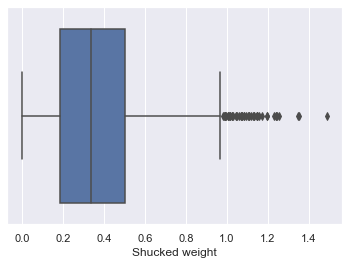

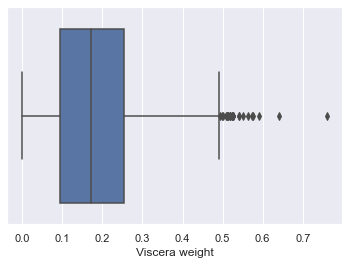

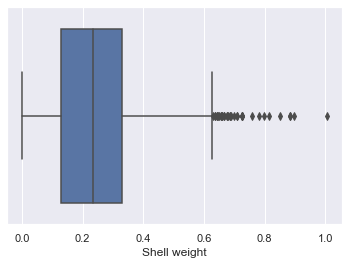

In [13]:
#checking for outliers using boxplot
for i in cols:
    plt.subplots()
    sns.boxplot(df[i])

boxplots show that all the features are having outlier values

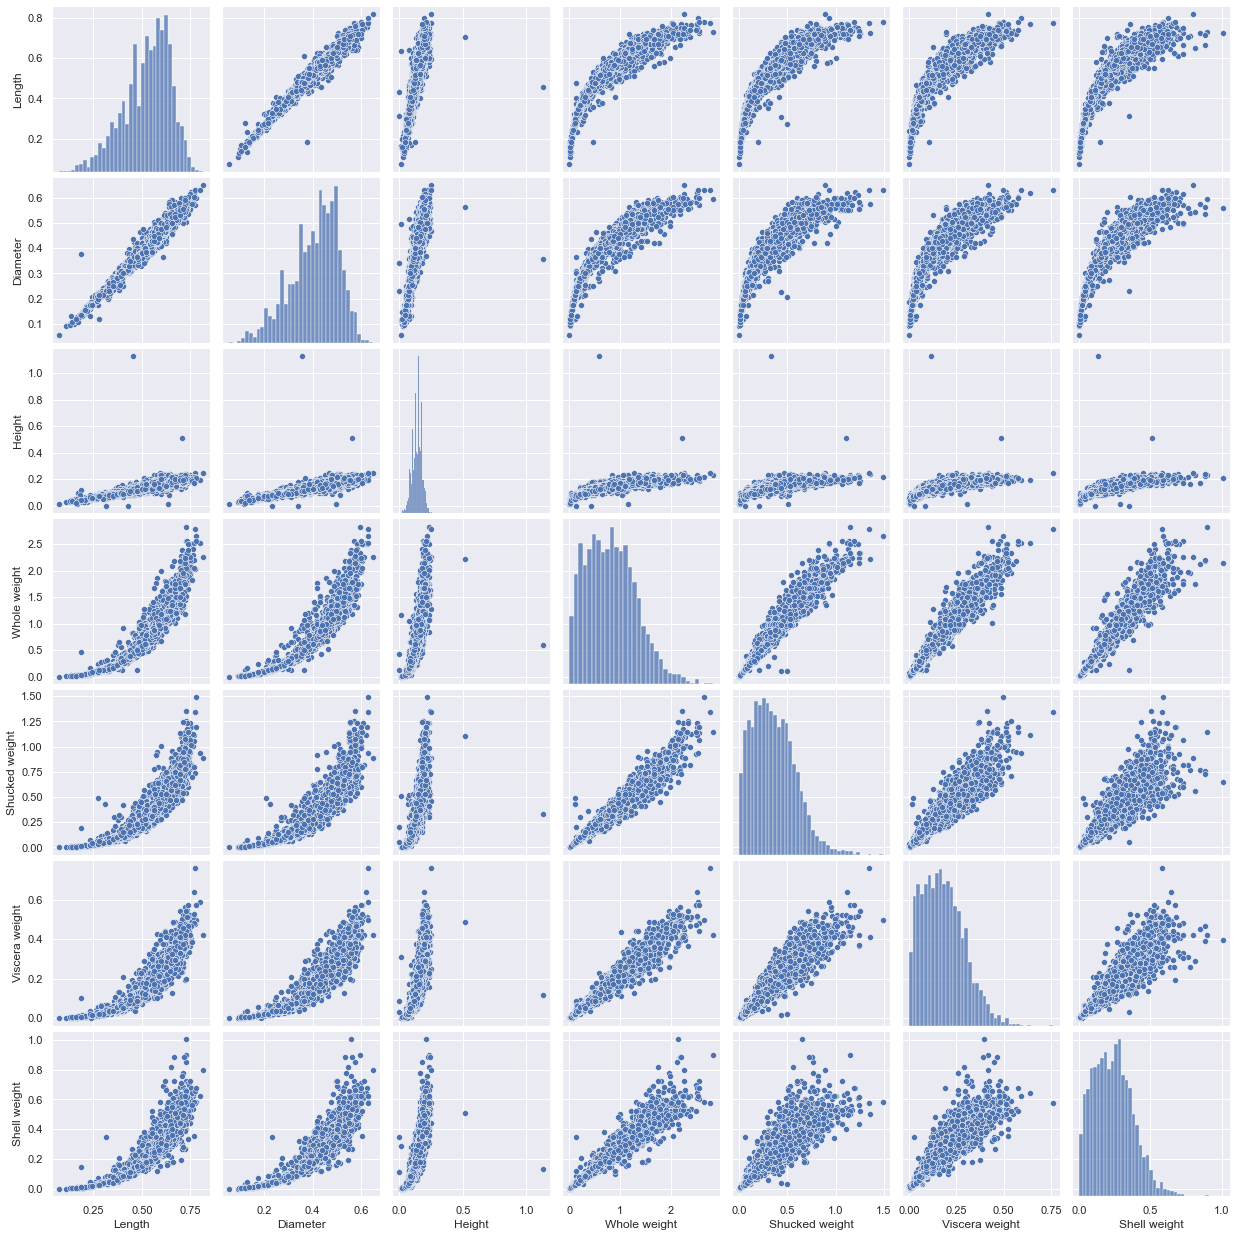

In [14]:
#pairplot to see the relationship between the variables
sns.pairplot(df[cols])

Most of the features seems to be having a possitive relation to other features`m

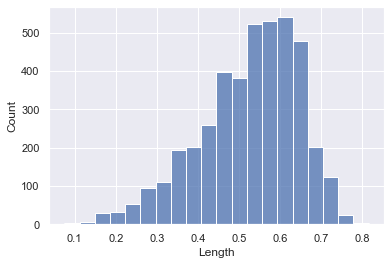

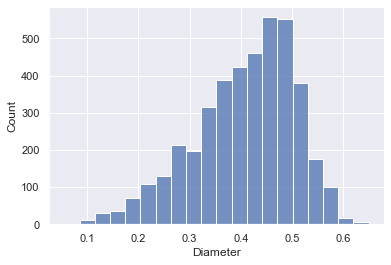

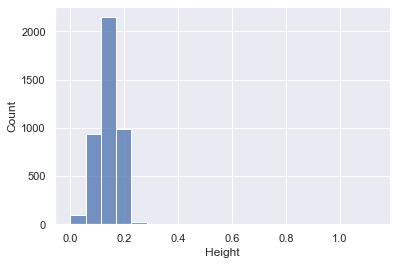

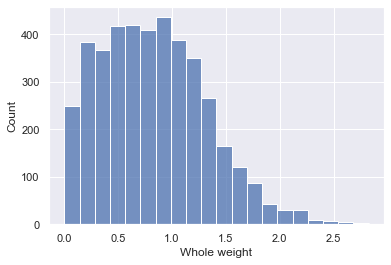

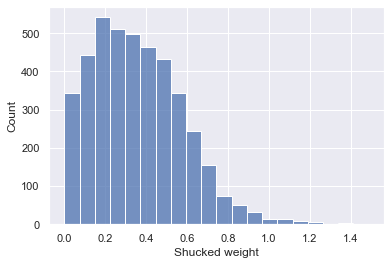

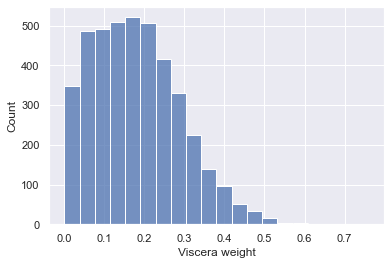

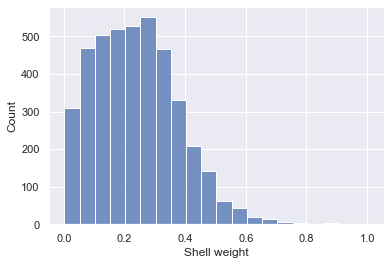

In [15]:
#plotting histogram to understand the distribution
for i in cols:
    plt.subplots()
    sns.histplot(data=df, x=i,bins=20)

The distribution of values in columns shows that there is sjewness with some of the features

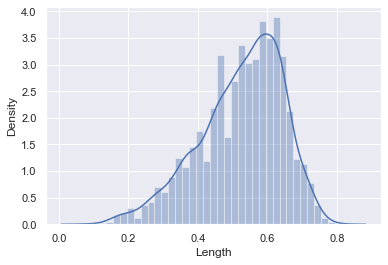

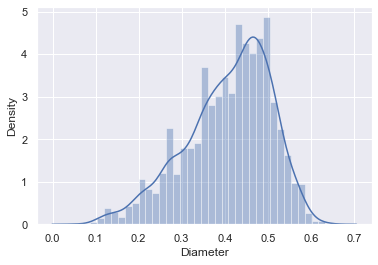

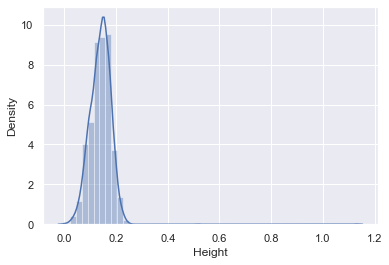

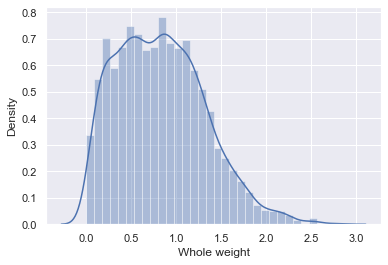

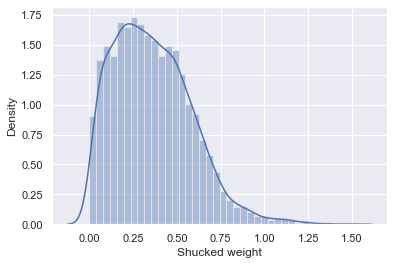

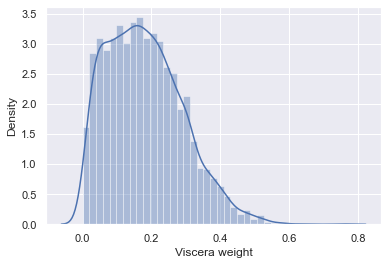

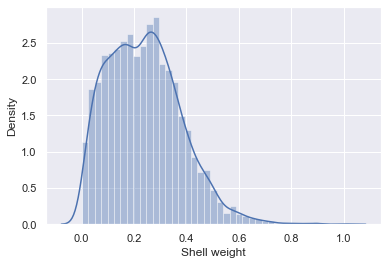

In [16]:
#ploting distplot
for i in cols:
    plt.subplots()
    sns.distplot(df[i])

The features  'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight' is right skewed
Length', 'Diameter' has a slight skewness to the left

### Encoding

Encoding the 'Sex' column

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Checking the outliers

In [18]:
from scipy.stats import zscore
zscr=np.abs(zscore(df))
zscr

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [19]:
threshold=3
print(np.where(zscr>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [20]:
df_new=df[(zscr<3).all(axis=1)]
df_new.shape

(4027, 9)

There are 150 outliers which are removed from the dataset

In [21]:
df_new.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [22]:
df=df_new

In [23]:
#checking skewness
df.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

Notable Skeness in Output variable

In [24]:
df['Rings']=np.sqrt(df['Rings'])


In [25]:
df.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.247399
dtype: float64

In [26]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,3.872983
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,2.645751
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,3.000000
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,3.162278
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,2.645751


In [27]:
x=df.iloc[:,0:8]
x.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [28]:
y=df.iloc[:,-1]
y

0       3.872983
1       2.645751
2       3.000000
3       3.162278
4       2.645751
          ...   
4172    3.316625
4173    3.162278
4174    3.000000
4175    3.162278
4176    3.464102
Name: Rings, Length: 4027, dtype: float64

In [29]:
#scaling

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [31]:
#checking the best random state
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    rs=r2_score(y_test,predlr)
    if rs>maxacc:
        maxacc=rs
        maxrs=i
print('best accuracy',maxacc,'on random state',maxrs)

best accuracy 0.5819805743750588 on random state 82


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .22, random_state = 82)

In [33]:
x_train.shape

(3141, 8)

In [34]:
y_train.shape

(3141,)

In [35]:
x_test.shape

(886, 8)

In [36]:
y_test.shape

(886,)

In [37]:
def model(mod):
    mod.fit(x_test,y_test)
    ##print(mod.coef_)
    pred=mod.predict(x_test)
    mod.score(x_train,y_train)
    print('\n\n')
    ##print('predicted', pred)
    ##print('actual:',y_test)
    rscr=r2_score(y_test,pred)
    print('r2score:',r2_score(y_test,pred))
    print('Mean squared error',mean_squared_error(y_test,pred))
    print('mean absolute error:',mean_absolute_error(y_test,pred))

In [38]:
#function for cross-validation
from sklearn.model_selection import cross_val_score
def crossval(mod):
    scores = cross_val_score(mod, x_train, y_train, scoring='r2',cv=5)
    print('mean_cross_validation:',scores.mean())

In [39]:
model(LinearRegression())
crossval(LinearRegression())




r2score: 0.6151115609842894
Mean squared error 0.08532144572235219
mean absolute error: 0.22476269646780478
mean_cross_validation: 0.5230710488692353


In [40]:
model(Lasso(alpha=0.01))
crossval(Lasso(alpha=0.01))




r2score: 0.5690770671476291
Mean squared error 0.09552629774982567
mean absolute error: 0.23557218087606038
mean_cross_validation: 0.5055360173835183


In [41]:

k=['linear','poly','rbf']
for i in k:
    print('\n')
    print('SVR kernel:',i)
    print('\n')
    svr=SVR(kernel=i)
    model(svr)
    crossval(svr)



SVR kernel: linear





r2score: 0.6056464505647128
Mean squared error 0.08741965606866767
mean absolute error: 0.22229732534061888
mean_cross_validation: 0.5152096694425199


SVR kernel: poly





r2score: 0.5166033564598237
Mean squared error 0.10715858493867846
mean absolute error: 0.2438746913577456
mean_cross_validation: 0.43116474608958555


SVR kernel: rbf





r2score: 0.672872111957564
Mean squared error 0.07251718034259043
mean absolute error: 0.19857524694736897
mean_cross_validation: 0.5793981423074637


In [42]:
model(RandomForestRegressor())

crossval(RandomForestRegressor())




r2score: 0.9438085668337177
Mean squared error 0.012456425885949876
mean absolute error: 0.08237629735814685
mean_cross_validation: 0.5627794751860646


In [43]:
model(KNeighborsRegressor())
crossval(KNeighborsRegressor())




r2score: 0.6896053900712136
Mean squared error 0.06880777435476212
mean absolute error: 0.1978827328844337
mean_cross_validation: 0.5114961908464023


In [44]:
model(ElasticNet())
crossval(ElasticNet())




r2score: 0.0
Mean squared error 0.22167838020946506
mean absolute error: 0.36399833630723305
mean_cross_validation: -0.001168128912393307


SVC shows the best result.hence, running with best parameters

### Hyper Parameter Tuning

In [45]:

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svr, param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.533 total time=   0.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.533 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.553 total time=   0.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.568 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.554 total time=   0.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.522 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.566 total time=   0.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.575 total time=   0.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.575 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.472 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.959 total time= 1.1min
[CV 3/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.767 total time= 1.1min
[CV 4/5] END ......C=1000, gamma=1, kernel=rbf;, score=-1.052 total time=  55.9s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-1.212 total time= 1.1min
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.525 total time=  24.6s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.479 total time=  20.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.490 total time=  22.3s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.387 total time=  19.7s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.483 total time=  20.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.580 total time=   2.4s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.543 total time=   2.8s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.565 total time=   2.8s
[CV 4/5] END ....C=1000, gam

In [47]:
svr_final=SVR(C=1,gamma=0.1,kernel='rbf')
model(svr_final)




r2score: 0.6664183992452362
Mean squared error 0.07394782892299649
mean absolute error: 0.2006535191450746


### Saving the model

In [48]:
import joblib
joblib.dump(svr_final, 'Abalone.obj')

['Abalone.obj']

In [49]:
svr_joblib = joblib.load('Abalone.obj')
svr_joblib.predict(x_test)

array([3.42051996, 3.05942508, 3.30811189, 3.17932389, 2.87573934,
       2.65799836, 3.34006737, 2.33047397, 3.10001957, 3.17631341,
       3.18885576, 3.1930353 , 2.57740157, 2.23208335, 3.24915929,
       3.48802909, 3.0945118 , 2.74828151, 3.28383868, 3.26419764,
       3.09518519, 3.04953704, 3.26511328, 2.25084511, 2.94337502,
       3.29072392, 3.17225251, 3.23806001, 3.1368779 , 2.8240244 ,
       3.10006669, 3.14579382, 3.10497631, 3.31954118, 3.3272845 ,
       3.04499421, 2.72664441, 3.22280073, 3.08476544, 3.07158968,
       3.03982886, 3.54852706, 3.42710097, 3.24383942, 3.25298669,
       2.94526765, 3.08728625, 3.24623673, 2.91401812, 3.54224529,
       3.09968984, 2.58391508, 2.88344977, 3.22328419, 2.50496476,
       2.84996418, 2.70869826, 2.74026859, 3.25797226, 2.37604506,
       3.40028603, 3.09991096, 3.01550159, 3.21656221, 3.07988788,
       2.88948596, 3.41683076, 2.5840235 , 3.11210672, 2.63904583,
       3.45595312, 3.57097696, 2.91259442, 2.73015289, 3.30398